# Lead Scoring Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Importing the libraries

In [1]:
#Import all useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing "leads.csv" dataset
lead_df = pd.read_csv("leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking dimensions of the dataframe
lead_df.shape

(9240, 37)

In [4]:
#Checking statistical aspects of the dataframe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#Checking datatype of each column
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [6]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
#Let us drop the useless columns
useless = ['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
lead_df = lead_df.drop(useless,1)
lead_df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,...,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Select,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,SMS Sent


In [8]:
#We can see that there are some columns which have entry like 'Select' 
#which means that no option was selected by the customer and hence we will replace it with null

In [9]:
#Replace the select with null values
lead_df = lead_df.replace(to_replace = 'Select', value = np.nan)

In [10]:
#Checking the percentage of null values
(lead_df.isnull().sum()/9240)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [11]:
#Droping the columns having more than 30% null values
drop = lead_df.isnull().sum()
drop = drop[drop.values/len(lead_df)>0.30]
drop1 = list(drop.keys())
lead_df = lead_df.drop(drop1,1)

In [12]:
#Checking null values again
(lead_df.isnull().sum()/9240)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [13]:
#To deal with null values, we can replace null value with mode for categorical variable

In [14]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [15]:
#Replacing null value with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].fillna(value = 'Google')

In [16]:
#Since there is google also which is logically same but technically different from 'Google',
#so replacing 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(to_replace='google',value='Google')

In [17]:
#Checking 'Lead Souce' column again
lead_df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [18]:
lead_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [19]:
#Replacing null value with 0
lead_df['TotalVisits'] = lead_df['TotalVisits'].fillna(value=0)

In [20]:
lead_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [21]:
#Replacing null value with 0
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].fillna(value=0)

In [22]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [23]:
#Replacing null value with 'Email Opened'
lead_df['Last Activity'] = lead_df['Last Activity'].fillna(value='Email Opened')

In [24]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
#Replacing null value with 'Unemployed'
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna(value='Unemployed')

In [26]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
#Replacing null value with 'Better Career Prospects'
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna(value='Better Career Prospects')

In [28]:
#Let us see the null values again
(lead_df.isnull().sum()/9240)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Receive More Updates About Our Courses        

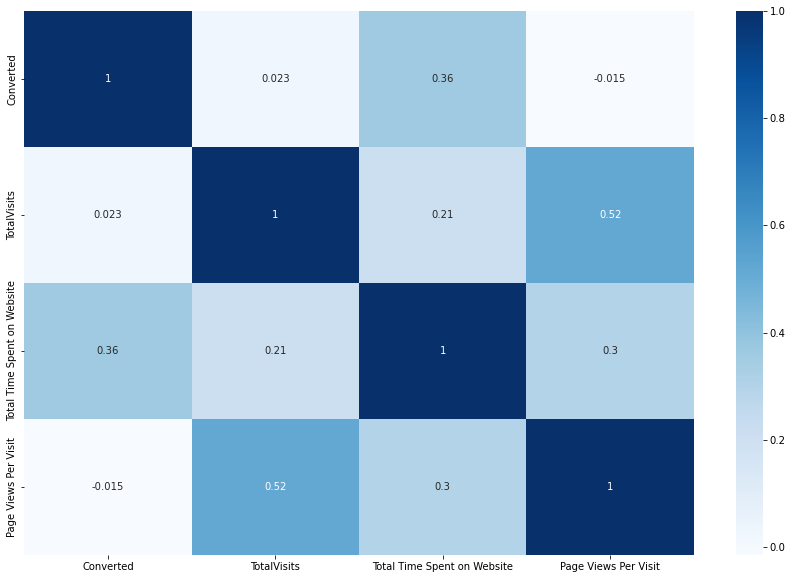

In [29]:
plt.figure(figsize=(15,10))
dataplot = sns.heatmap(lead_df.corr(), cmap="Blues", annot=True)
plt.show()

## Data Transformation

In [30]:
#Assigning 1 to 'Yes' and 0 to 'No'

In [31]:
z = {"No":0,"Yes":1} #Creating dictionary for two categories

# for Column 'Do Not Email'

lead_df['Do Not Email'] = lead_df['Do Not Email'].map(z)

# for Column 'Do Not Call'

lead_df['Do Not Call'] = lead_df['Do Not Call'].map(z)

# for Column 'Search'

lead_df['Search'] = lead_df['Search'].map(z)

# for Column 'Magazine'

lead_df['Magazine'] = lead_df['Magazine'].map(z)

# for Column 'Newspaper Article'

lead_df['Newspaper Article'] = lead_df['Newspaper Article'].map(z)

# for Column 'X Education Forums'

lead_df['X Education Forums'] = lead_df['X Education Forums'].map(z)

# for Column 'Newspaper'

lead_df['Newspaper'] = lead_df['Newspaper'].map(z)
# Column 'Digital Advertisement'

lead_df['Digital Advertisement'] = lead_df['Digital Advertisement'].map(z)

# for Column 'Through Recommendations'

lead_df['Through Recommendations'] = lead_df['Through Recommendations'].map(z)

# for Column 'Receive More Updates About Our Courses'

lead_df['Receive More Updates About Our Courses'] = lead_df['Receive More Updates About Our Courses'].map(z)

# for Column 'Update me on Supply Chain Content'

lead_df['Update me on Supply Chain Content'] = lead_df['Update me on Supply Chain Content'].map(z)

# for Column 'Get updates on DM Content'

lead_df['Get updates on DM Content'] = lead_df['Get updates on DM Content'].map(z)

In [32]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   What is your current occupation                9240 

In [33]:
dummy = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)
lead_df = pd.concat([lead_df,dummy],axis=1)

lead_df.shape

(9240, 83)

In [34]:
duplicates = ['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']

lead_df = lead_df.drop(duplicates,1)

lead_df.shape

(9240, 77)

In [35]:
#Dropping redundant variables
red = ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']
lead_df = lead_df.drop(red,1)

In [36]:
#Converting some categorical into object
lead_df["TotalVisits"] = lead_df.TotalVisits.astype(float)
lead_df["Page Views Per Visit"] = lead_df["Page Views Per Visit"].astype(float)

In [37]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

## Train-Test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#Putting feature variable to Xlead_df
X = lead_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
#Putting response variable to y
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [41]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.015936,0.214349,0.024182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.019920,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.019920,0.541373,0.090909,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Building the Model

### Model 1

In [43]:
import statsmodels.api as sm

In [44]:
#Building Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 22 Jan 2023   Deviance:                   1.6947e+05
Time:                        14:45:26   Pearson chi2:                 8.29e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.968e+15   5.25e+07   3.75e+07      0.000    1.97e+15    1.97e+15
Do Not Email                                                            -2.446e+14   4.43e+06  -5.52e+07      0.000   -2.45e+14   -2.45e+14
Do Not Call                                                              3.471e+15   4.75e+07    7.3e+07      0.000    3.47e+15    3.47e+15
TotalVisits                                                              4.378e+15   4.72e+07   9.28e+07      0.000    4.38e+15    4.38e+15
Total Time Spent on Website                                              3.127e+15   3.93e+06   7.95e+08      0.000    3.13e+15    3.13e+15
Page Views Per Visit                                                    -1.475e+15   3.05e+07  -4.84e+07      0.000   -1.48e+15   -1.48e+15
Search                                                                   3.051e+14    2.2e+07   1.38e+07      0.000    3.05e+14    3.05e+14
Newspaper Article                                                        4.788e+15   6.73e+07   7.12e+07      0.000    4.79e+15    4.79e+15
X Education Forums                                                       -6.57e+15   1.11e+08  -5.92e+07      0.000   -6.57e+15   -6.57e+15
Newspaper                                                               -6.704e+15   6.72e+07  -9.98e+07      0.000    -6.7e+15    -6.7e+15
Digital Advertisement                                                   -2.506e+15   4.76e+07  -5.27e+07      0.000   -2.51e+15   -2.51e+15
Through Recommendations                                                 -3.959e+14   2.85e+07  -1.39e+07      0.000   -3.96e+14   -3.96e+14
Lead Origin_Landing Page Submission                                     -1.334e+14   2.52e+06  -5.29e+07      0.000   -1.33e+14   -1.33e+14
Lead Origin_Lead Add Form                                                1.711e+15    1.3e+07   1.32e+08      0.000    1.71e+15    1.71e+15
Lead Origin_Lead Import                                                  -6.04e+14    4.8e+07  -1.26e+07      0.000   -6.04e+14   -6.04e+14
Lead Origin_Quick Add Form                                               3.201e+15   6.74e+07   4.75e+07      0.000     3.2e+15     3.2e+15
Lead Source_Direct Traffic                                               1.178e+15   4.09e+07   2.88e+07      0.000    1.18e+15    1.18e+15
Lead Source_Facebook                                                     1.792e+15    6.3e+07   2.84e+07      0.000    1.79e+15    1.79e+15
Lead Source_Google                                                       1.515e+15   4.08e+07   3.71e+07      0.000    1.51e+15    1.51e+15
Lea

### Feature selection using RFE

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [46]:
from sklearn.feature_selection import RFE
#Running RFE with 20 variables as output
rfe = RFE(estimator = logreg, n_features_to_select = 20)            
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 20),
 ('Newspaper Article', False, 16),
 ('X Education Forums', False, 37),
 ('Newspaper', False, 3),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 27),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Origin_Quick Add Form', False, 13),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source

In [48]:
#Variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Digital Advertisement',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Model 2

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.1
Date:                Sun, 22 Jan 2023   Deviance:                       5346.2
Time:                        14:45:29   Pearson chi2:                 7.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8356      0.106     -7.915      0.000      -1.043      -0.629
Do Not Email                                            -1.3201      0.196     -6.734      0.000      -1.704      -0.936
TotalVisits                                              9.2487      2.435      3.799      0.000       4.477      14.021
Total Time Spent on Website                              4.5594      0.165     27.714      0.000       4.237       4.882
Page Views Per Visit                                    -3.4176      1.291     -2.648      0.008      -5.947      -0.888
Digital Advertisement                                  -22.0917   2.77e+04     -0.001      0.999   -5.43e+04    5.42e+04
Lead Origin_Lead Add Form                                3.1842      0.494      6.447      0.000       2.216       4.152
Lead Source_Olark Chat                                   1.1016      0.120      9.177      0.000       0.866       1.337
Lead Source_Reference                                    0.5781      0.523      1.105      0.269      -0.447       1.603
Lead Source_Welingak Website                             2.4853      0.869      2.859      0.004       0.782       4.189
Last Activity_Converted to Lead                         -1.0446      0.229     -4.567      0.000      -1.493      -0.596
Last Activity_Email Bounced                             -1.1013      0.347     -3.171      0.002      -1.782      -0.421
Last Activity_Olark Chat Conversation                   -1.2336      0.193     -6.377      0.000      -1.613      -0.854
What is your current occupation_Housewife               22.9131   1.38e+04      0.002      0.999   -2.69e+04     2.7e+04
What is your current occupation_Working Professional     2.8051      0.189     14.880      0.000       2.436       3.175
Last Notable Activity_Email Link Clicked                -1.9204      0.272     -7.052      0.000      -2.454      -1.387
Last Notable Activity_Email Opened                      -1.3407      0.087    -15.403      0.000      -1.511      -1.170
Last Notable Activity_Had a Phone Conversation           2.0245      1.102      1.836      0.066      -0.136       4.185
Last Notable Activity_Modified                          -1.6905      0.099    -17.017      0.000      -1.885      -1.496
Last Notable Activity_Olark Chat Conversation           -1.4818      0.377     -3.930      0.000      -2.221      -0.743
Last Notable Activity_Page Visited on Website           -1.8527      0.204     -9.088      0.000      -2.252      -1.453
========================================================================================================================
"""

In [50]:
#Dropping 'Digital Advertisement' as it has high p value

In [51]:
col = col.drop('Digital Advertisement', 1)

### Model 3

In [52]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.6
Date:                Sun, 22 Jan 2023   Deviance:                       5349.1
Time:                        14:45:29   Pearson chi2:                 7.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8362      0.106     -7.922      0.000      -1.043      -0.629
Do Not Email                                            -1.3163      0.196     -6.716      0.000      -1.700      -0.932
TotalVisits                                              9.1067      2.417      3.767      0.000       4.369      13.844
Total Time Spent on Website                              4.5631      0.165     27.737      0.000       4.241       4.886
Page Views Per Visit                                    -3.4427      1.288     -2.674      0.008      -5.967      -0.919
Lead Origin_Lead Add Form                                3.1829      0.494      6.445      0.000       2.215       4.151
Lead Source_Olark Chat                                   1.1005      0.120      9.170      0.000       0.865       1.336
Lead Source_Reference                                    0.5783      0.523      1.105      0.269      -0.447       1.604
Lead Source_Welingak Website                             2.4854      0.869      2.859      0.004       0.782       4.189
Last Activity_Converted to Lead                         -1.0440      0.229     -4.564      0.000      -1.492      -0.596
Last Activity_Email Bounced                             -1.1036      0.347     -3.177      0.001      -1.784      -0.423
Last Activity_Olark Chat Conversation                   -1.2320      0.193     -6.369      0.000      -1.611      -0.853
What is your current occupation_Housewife               22.9133   1.38e+04      0.002      0.999   -2.69e+04     2.7e+04
What is your current occupation_Working Professional     2.8064      0.189     14.888      0.000       2.437       3.176
Last Notable Activity_Email Link Clicked                -1.9175      0.272     -7.041      0.000      -2.451      -1.384
Last Notable Activity_Email Opened                      -1.3375      0.087    -15.375      0.000      -1.508      -1.167
Last Notable Activity_Had a Phone Conversation           2.0304      1.103      1.842      0.066      -0.130       4.191
Last Notable Activity_Modified                          -1.6900      0.099    -17.018      0.000      -1.885      -1.495
Last Notable Activity_Olark Chat Conversation           -1.4807      0.377     -3.927      0.000      -2.220      -0.742
Last Notable Activity_Page Visited on Website           -1.8466      0.204     -9.064      0.000      -2.246      -1.447
========================================================================================================================
"""

### Model 4

In [53]:
#Dropping 'What is your current occupation_Housewife' column as it has high p value

In [54]:
col = col.drop('What is your current occupation_Housewife', 1)

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.7
Date:                Sun, 22 Jan 2023   Deviance:                       5363.4
Time:                        14:45:29   Pearson chi2:                 7.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3936
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8307      0.105     -7.876      0.000      -1.037      -0.624
Do Not Email                                            -1.3184      0.196     -6.728      0.000      -1.702      -0.934
TotalVisits                                              9.0319      2.410      3.748      0.000       4.309      13.755
Total Time Spent on Website                              4.5593      0.164     27.747      0.000       4.237       4.881
Page Views Per Visit                                    -3.4792      1.286     -2.705      0.007      -6.001      -0.958
Lead Origin_Lead Add Form                                3.1751      0.494      6.431      0.000       2.207       4.143
Lead Source_Olark Chat                                   1.0906      0.120      9.101      0.000       0.856       1.325
Lead Source_Reference                                    0.6008      0.523      1.149      0.251      -0.424       1.626
Lead Source_Welingak Website                             2.4819      0.869      2.856      0.004       0.778       4.185
Last Activity_Converted to Lead                         -1.0549      0.229     -4.614      0.000      -1.503      -0.607
Last Activity_Email Bounced                             -1.1083      0.347     -3.191      0.001      -1.789      -0.427
Last Activity_Olark Chat Conversation                   -1.2384      0.193     -6.406      0.000      -1.617      -0.859
What is your current occupation_Working Professional     2.8005      0.188     14.858      0.000       2.431       3.170
Last Notable Activity_Email Link Clicked                -1.8994      0.270     -7.038      0.000      -2.428      -1.370
Last Notable Activity_Email Opened                      -1.3312      0.087    -15.317      0.000      -1.502      -1.161
Last Notable Activity_Had a Phone Conversation           2.0299      1.103      1.841      0.066      -0.131       4.191
Last Notable Activity_Modified                          -1.6809      0.099    -16.955      0.000      -1.875      -1.487
Last Notable Activity_Olark Chat Conversation           -1.4707      0.377     -3.902      0.000      -2.209      -0.732
Last Notable Activity_Page Visited on Website           -1.8447      0.204     -9.058      0.000      -2.244      -1.446
========================================================================================================================
"""

### Model 5

In [56]:
#Dropping 'Lead Source_Reference' column as it has high p value

In [57]:
col = col.drop('Lead Source_Reference', 1)

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.3
Date:                Sun, 22 Jan 2023   Deviance:                       5364.6
Time:                        14:45:29   Pearson chi2:                 7.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3934
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8306      0.105     -7.873      0.000      -1.037      -0.624
Do Not Email                                            -1.3326      0.197     -6.780      0.000      -1.718      -0.947
TotalVisits                                              9.0449      2.409      3.754      0.000       4.323      13.767
Total Time Spent on Website                              4.5578      0.164     27.743      0.000       4.236       4.880
Page Views Per Visit                                    -3.4884      1.287     -2.711      0.007      -6.010      -0.967
Lead Origin_Lead Add Form                                3.7031      0.201     18.395      0.000       3.309       4.098
Lead Source_Olark Chat                                   1.0891      0.120      9.087      0.000       0.854       1.324
Lead Source_Welingak Website                             1.9552      0.744      2.629      0.009       0.498       3.413
Last Activity_Converted to Lead                         -1.0569      0.229     -4.623      0.000      -1.505      -0.609
Last Activity_Email Bounced                             -1.1257      0.349     -3.227      0.001      -1.809      -0.442
Last Activity_Olark Chat Conversation                   -1.2389      0.193     -6.409      0.000      -1.618      -0.860
What is your current occupation_Working Professional     2.8033      0.188     14.878      0.000       2.434       3.173
Last Notable Activity_Email Link Clicked                -1.8926      0.269     -7.032      0.000      -2.420      -1.365
Last Notable Activity_Email Opened                      -1.3291      0.087    -15.298      0.000      -1.499      -1.159
Last Notable Activity_Had a Phone Conversation           2.0302      1.103      1.841      0.066      -0.131       4.191
Last Notable Activity_Modified                          -1.6785      0.099    -16.933      0.000      -1.873      -1.484
Last Notable Activity_Olark Chat Conversation           -1.4679      0.377     -3.896      0.000      -2.206      -0.729
Last Notable Activity_Page Visited on Website           -1.8436      0.204     -9.049      0.000      -2.243      -1.444
========================================================================================================================
"""

### Model 6

In [59]:
#Dropping 'Last Notable Activity_Had a Phone Conversation' column as it has high p value

In [60]:
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2684.7
Date:                Sun, 22 Jan 2023   Deviance:                       5369.5
Time:                        14:45:29   Pearson chi2:                 7.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3930
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8172      0.105     -7.764      0.000      -1.023      -0.611
Do Not Email                                            -1.3414      0.197     -6.824      0.000      -1.727      -0.956
TotalVisits                                              9.2278      2.416      3.820      0.000       4.493      13.963
Total Time Spent on Website                              4.5485      0.164     27.721      0.000       4.227       4.870
Page Views Per Visit                                    -3.5163      1.287     -2.733      0.006      -6.038      -0.995
Lead Origin_Lead Add Form                                3.6997      0.201     18.377      0.000       3.305       4.094
Lead Source_Olark Chat                                   1.0842      0.120      9.051      0.000       0.849       1.319
Lead Source_Welingak Website                             1.9550      0.744      2.628      0.009       0.497       3.413
Last Activity_Converted to Lead                         -1.0567      0.229     -4.624      0.000      -1.505      -0.609
Last Activity_Email Bounced                             -1.1209      0.349     -3.214      0.001      -1.804      -0.437
Last Activity_Olark Chat Conversation                   -1.2377      0.193     -6.403      0.000      -1.616      -0.859
What is your current occupation_Working Professional     2.8018      0.188     14.871      0.000       2.433       3.171
Last Notable Activity_Email Link Clicked                -1.9034      0.269     -7.074      0.000      -2.431      -1.376
Last Notable Activity_Email Opened                      -1.3405      0.087    -15.455      0.000      -1.510      -1.170
Last Notable Activity_Modified                          -1.6891      0.099    -17.060      0.000      -1.883      -1.495
Last Notable Activity_Olark Chat Conversation           -1.4787      0.377     -3.925      0.000      -2.217      -0.740
Last Notable Activity_Page Visited on Website           -1.8587      0.204     -9.128      0.000      -2.258      -1.460
========================================================================================================================
"""

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,2.93
13,Last Notable Activity_Modified,2.52
1,TotalVisits,1.99
9,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
2,Total Time Spent on Website,1.85
8,Last Activity_Email Bounced,1.82
5,Lead Source_Olark Chat,1.68
12,Last Notable Activity_Email Opened,1.67
4,Lead Origin_Lead Add Form,1.44


In [63]:
#Now both p values and VIF is fine

In [64]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.254740
6795    0.245890
3516    0.302106
8105    0.818977
3934    0.194330
4844    0.993379
3297    0.124129
8071    0.990787
987     0.123630
7423    0.911035
dtype: float64

In [65]:
#Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25473975, 0.24589035, 0.3021062 , 0.8189773 , 0.1943299 ,
       0.9933786 , 0.12412902, 0.99078717, 0.12363011, 0.91103471])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [66]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id
0,0,0.254740,1871
1,0,0.245890,6795
2,0,0.302106,3516
3,0,0.818977,8105
4,0,0.194330,3934


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [67]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted
0,0,0.254740,1871,0
1,0,0.245890,6795,0
2,0,0.302106,3516,0
3,0,0.818977,8105,1
4,0,0.194330,3934,0


In [68]:
from sklearn import metrics
#Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3552  450]
 [ 729 1737]]


In [69]:
# Predicted        not_converted    converted
# Actual
# not_converted        3553           449
# converted            740            1726

In [70]:
#Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8177179962894249


#### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
#Checking the sensitivity of our logistic regression model
TP/float(TP + FN)

0.7043795620437956

In [73]:
#Calculating specificity
TN/float(TN + FP)

0.8875562218890555

In [74]:
#Calculating false postive rate - predicting non conversion when leads have converted
print(FP/float(TN + FP))

0.11244377811094453


In [75]:
#Positive predictive value 
print(TP/float(TP + FP))

0.7942386831275721


In [76]:
#Negative predictive value
print(TN/float(TN + FN))

0.8297126839523475


### ROC Curve

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

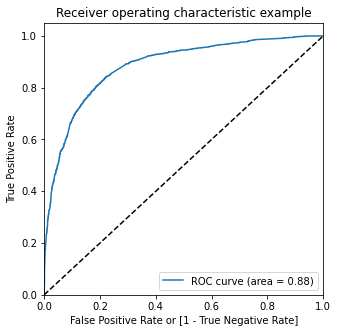

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

 ### Optimal cutoff point

In [80]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.254740,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.245890,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.302106,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.818977,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.194330,3934,0,1,1,0,0,0,0,0,0,0,0


In [81]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] =[i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.588745  0.967559  0.355322
0.2   0.2  0.758349  0.906326  0.667166
0.3   0.3  0.802876  0.839822  0.780110
0.4   0.4  0.814780  0.769667  0.842579
0.5   0.5  0.817718  0.704380  0.887556
0.6   0.6  0.798701  0.594079  0.924788
0.7   0.7  0.782622  0.514193  0.948026
0.8   0.8  0.759586  0.415653  0.971514
0.9   0.9  0.716141  0.275345  0.987756


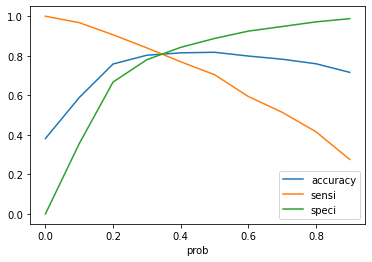

In [82]:
#Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [83]:
#Making the final prediction using 0.36 as the cut off
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.254740,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.245890,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.302106,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.818977,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.194330,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [84]:
#Calculating the lead score
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x:round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.254740,1871,0,1,1,1,0,0,0,0,0,0,0,0,25
1,0,0.245890,6795,0,1,1,1,0,0,0,0,0,0,0,0,25
2,0,0.302106,3516,0,1,1,1,1,0,0,0,0,0,0,0,30
3,0,0.818977,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.194330,3934,0,1,1,0,0,0,0,0,0,0,0,0,19
5,1,0.993379,4844,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.124129,3297,0,1,1,0,0,0,0,0,0,0,0,0,12
7,1,0.990787,8071,1,1,1,1,1,1,1,1,1,1,1,1,99
8,0,0.123630,987,0,1,1,0,0,0,0,0,0,0,0,0,12
9,1,0.911035,7423,1,1,1,1,1,1,1,1,1,1,1,1,91


In [85]:
#Checking if 80% cases are correctly predicted based on the converted column.\
#Getting total value of final predicted conversion / non conversion counts from the actual converted rates
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted'] == 1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1963
0     503
Name: final_predicted, dtype: int64

In [86]:
#Checking the precentage of final_predicted conversions
1966/float(1966 + 500)

0.797242497972425

In [87]:
#Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8101422387136673

In [88]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3277,  725],
       [ 503, 1963]], dtype=int64)

In [89]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
#Checking the sensitivity of our logistic regression model
TP / float(TP + FN)

0.7960259529602596

In [91]:
#Calculating specificity
TN / float(TN + FP)

0.8188405797101449

In [92]:
#Calculating false postive rate - predicting conversions when leads has not converted
print(FP/ float(TN + FP))

0.18115942028985507


In [93]:
#Positive predictive value 
print (TP / float(TP + FP))

0.7302827380952381


In [94]:
#Negative predictive value
print (TN / float(TN + FN))

0.8669312169312169


#### Precision and Recall

In [95]:
from sklearn.metrics import precision_score, recall_score

In [96]:
#Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7942386831275721

In [97]:
#Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7043795620437956

### Precision and recall tradeoff

In [98]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

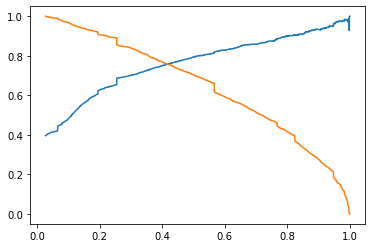

In [99]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1] )
plt.plot(thresholds, r[:-1] )
plt.show()

### Predictions on the test set

In [100]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [101]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,0,0.031873,0.444982,0.145455,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0
7766,0,0.019920,0.025968,0.090909,0,0,0,0,0,0,1,0,0,0,0,0
9199,0,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,0,1,0,0
4359,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0


In [102]:
X_test_sm = sm.add_constant(X_test)

In [103]:
y_test_pred = res.predict(X_test_sm)

In [104]:
y_test_pred[:10]

4269    0.728987
2376    0.946975
7766    0.877276
9199    0.065389
4359    0.823763
9186    0.560952
1631    0.434021
8963    0.167044
8007    0.049464
5324    0.359307
dtype: float64

In [105]:
#Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
#Checking top 5 rows and columns
y_pred_1.head()

,0
4269,0.728987
2376,0.946975
7766,0.877276
9199,0.065389
4359,0.823763


In [107]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [108]:
#Putting Lead_Id to index
y_test_df['Lead_Id'] = y_test_df.index

In [109]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [110]:
#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
y_test_df

,Converted
0,1
1,1
2,1
3,0
4,1
...,...
2767,0
2768,1
2769,0
2770,0


In [112]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [113]:
y_pred_final.head()

,Converted,0
0,1,0.728987
1,1,0.946975
2,1,0.877276
3,0,0.065389
4,1,0.823763


In [114]:
#Renaming the column 
y_pred_final= y_pred_final.rename(columns={0:'Converted_Prob'})

In [115]:
#Based on cut off threshold using accuracy, sensitivity and specificity of 0.36%
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x:1 if x > 0.36 else 0)

In [116]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.728987,1
1,1,0.946975,1
2,1,0.877276,1
3,0,0.065389,0
4,1,0.823763,1


In [117]:
#Now, Calculating the lead score
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x:round(x*100))
y_pred_final.head(20)

,Converted,Converted_Prob,final_predicted,lead_score
0,1,0.728987,1,73
1,1,0.946975,1,95
2,1,0.877276,1,88
3,0,0.065389,0,7
4,1,0.823763,1,82
5,1,0.560952,1,56
6,1,0.434021,1,43
7,1,0.167044,0,17
8,0,0.049464,0,5
9,1,0.359307,0,36


In [118]:
#Getting the total of final predicted conversion or non conversion counts from the actual converted rates
checking_test_df = y_pred_final.loc[y_pred_final['Converted'] == 1, ['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    872
0    223
Name: final_predicted, dtype: int64

In [119]:
#Checking the precentage of final_predicted conversions on test data
872/float(872 + 223)

0.7963470319634703

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [120]:
#Now, Checking the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8192640692640693

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1399,  278],
       [ 223,  872]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
#Checking the sensitivity of our logistic regression model
TP / float(TP + FN)

0.7963470319634703

In [124]:
#Now, Calculating specificity
TN / float(TN + FP)

0.8342277877161598

#### Precision and Recall metrics for the test set

In [125]:
#Precision
print('precision', precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

#Recall
print('recall', recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision 0.7582608695652174
recall 0.7963470319634703


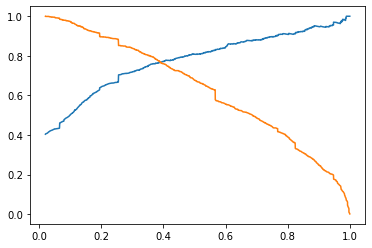

In [126]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1])
plt.plot(thresholds, r[:-1])
plt.show()